In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
file = 'phishing_data.csv'
df = pd.read_csv(file)

In [136]:
#linear SVC

In [137]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

linearsvc = LinearSVC()
# Do the test 10 times with a LinearSVC and get the average score
quick_test_afew_times(linearsvc, X, y)

0.92698221284293036

In [138]:
decisiontree = DecisionTreeClassifier()
quick_test_afew_times(decisiontree, X, y)

0.96198372022912282

In [139]:
decisiontree = 
(max_depth=50)
quick_test_afew_times(decisiontree, X, y)

0.95803436840518541

In [140]:
randomforest = RandomForestClassifier()
quick_test_afew_times(randomforest, X, y)

0.96825444678926753

In [168]:
randomforest = RandomForestClassifier(max_features = 5)
quick_test_afew_times(randomforest, X, y)

0.96903828760928545

In [158]:
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
from sklearn.metrics import recall_score
y_pred = randomforest.predict(xtest)
recall_score(ytest, y_pred, average='micro')

0.98281579740729574

In [141]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)
quick_test_afew_times(randomforest, X, y)

0.96750075369309607

In [150]:
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
X.columns.values

array(['having_IP_Address', 'URLURL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report'], dtype=object)

Feature ranking:
1. SSLfinal_State (0.321681)
2. URL_of_Anchor (0.230943)
3. web_traffic (0.069557)
4. having_Sub_Domain (0.054795)
5. Prefix_Suffix (0.048913)
6. Links_in_tags (0.040791)
7. Request_URL (0.024626)
8. SFH (0.024060)
9. Links_pointing_to_page (0.019435)
10. Domain_registeration_length (0.018200)
11. age_of_domain (0.016704)
12. having_IP_Address (0.014222)
13. Google_Index (0.013081)
14. Page_Rank (0.012872)
15. DNSRecord (0.012582)
16. URLURL_Length (0.009853)
17. HTTPS_token (0.006545)
18. Shortining_Service (0.006206)
19. popUpWidnow (0.005948)
20. Redirect (0.005876)
21. having_At_Symbol (0.005841)
22. Submitting_to_email (0.005828)
23. Statistical_report (0.005399)
24. Abnormal_URL (0.005172)
25. Favicon (0.004601)
26. double_slash_redirecting (0.004357)
27. on_mouseover (0.004171)
28. port (0.003083)
29. Iframe (0.002944)
30. RightClick (0.001716)


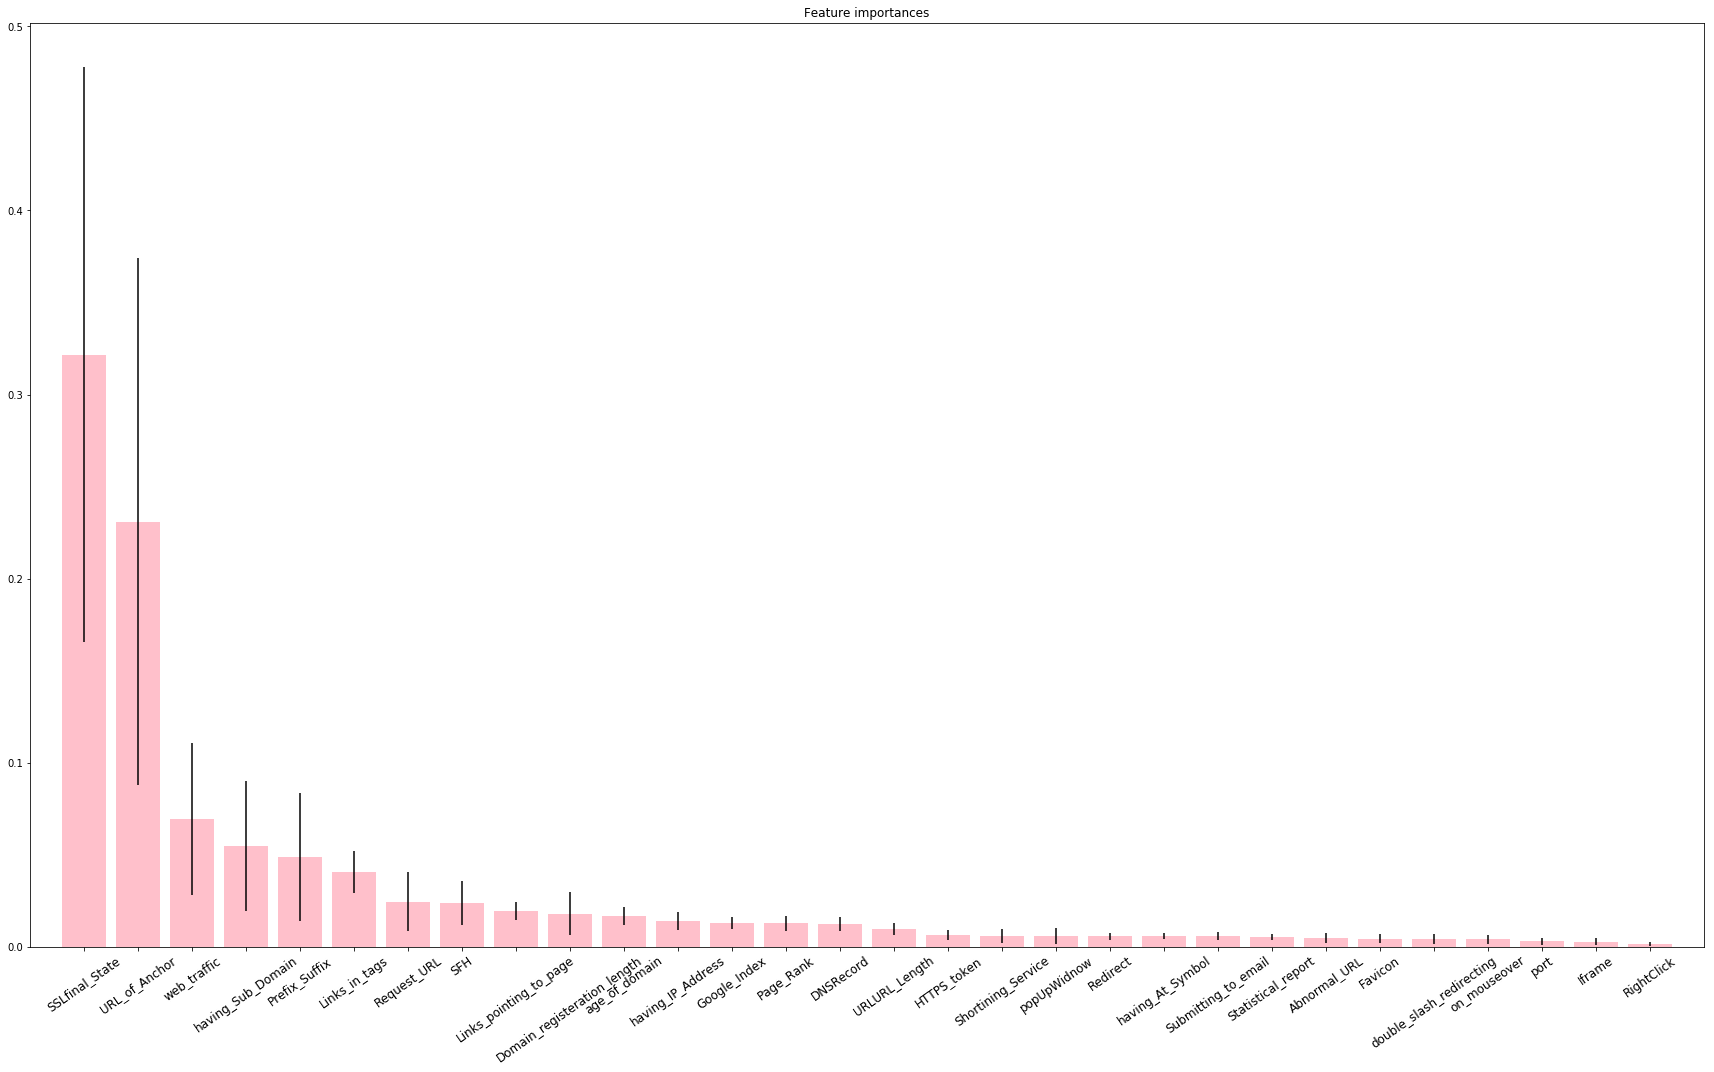

In [154]:
print("Feature ranking:")

column_count = X.shape[1]

for f in range(column_count):
    print("%d. %s (%f)" % (f + 1, X.columns.values[indices[f]], importances[indices[f]]))

plt.figure(figsize=(30, 17))
plt.title("Feature importances")
plt.bar(range(column_count), importances[indices], yerr=std[indices], color='pink')
plt.xticks(range(column_count), X.columns.values[indices], rotation=35, fontsize=12)
plt.xlim([-1, column_count])
plt.show()


In [122]:
sorted(importances)

[0.0017158018030520711,
 0.002943560201549158,
 0.0030826399151214772,
 0.0041709030176531785,
 0.004356993140427764,
 0.0046009487192190373,
 0.0051715956315421209,
 0.0053986422637779799,
 0.005827646533675377,
 0.0058413263932249361,
 0.0058755182564213275,
 0.0059483726679479057,
 0.0062062145773638337,
 0.0065450138295422063,
 0.0098532506136825813,
 0.01258174303244637,
 0.012871700489327568,
 0.01308092651659502,
 0.014222399020247736,
 0.016703899822921229,
 0.018200190631066586,
 0.019435496484949504,
 0.024059744787239469,
 0.024625645848520734,
 0.040791431773046574,
 0.048912530397186016,
 0.054794647124820517,
 0.06955653951582827,
 0.23094330490556234,
 0.32168137208604075]